In [159]:
import pandas as pd
import numpy as np


In [160]:
ETH = pd.read_csv('ETH.csv')
ETH

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,0.933712,0.954822,0.931442,0.948024,0.948024,2.060620e+05
1,2016-01-02,0.947401,0.969637,0.936560,0.937124,0.937124,2.555040e+05
2,2016-01-03,0.938430,0.991362,0.934313,0.971905,0.971905,4.076320e+05
3,2016-01-04,0.972045,0.976438,0.929835,0.954480,0.954480,3.462450e+05
4,2016-01-05,0.953147,0.970597,0.946543,0.950176,0.950176,2.198330e+05
...,...,...,...,...,...,...,...
1822,2020-12-27,635.887146,711.393555,628.334961,682.642334,682.642334,2.609355e+10
1823,2020-12-28,683.205811,745.877747,683.205811,730.397339,730.397339,2.422257e+10
1824,2020-12-29,730.358704,737.952881,692.149414,731.520142,731.520142,1.871068e+10
1825,2020-12-30,731.472839,754.303223,720.988892,751.618958,751.618958,1.729457e+10


In [161]:
df = pd.read_csv('ETH.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,0.933712,0.954822,0.931442,0.948024,0.948024,206062.0
1,2016-01-02,0.947401,0.969637,0.936560,0.937124,0.937124,255504.0
2,2016-01-03,0.938430,0.991362,0.934313,0.971905,0.971905,407632.0
3,2016-01-04,0.972045,0.976438,0.929835,0.954480,0.954480,346245.0
4,2016-01-05,0.953147,0.970597,0.946543,0.950176,0.950176,219833.0


In [162]:
df.set_index('Date', inplace = True)


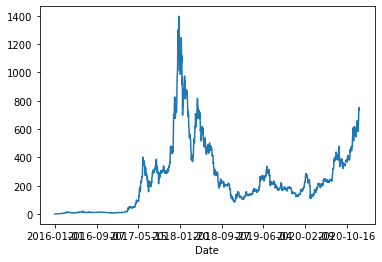

In [163]:
df['Adj Close'].plot()

In [164]:
data=df.copy()

In [165]:
data.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [166]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [167]:
lag_features=['High', 'Low', 'Volume']
window1=3
window2=7

In [168]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [169]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [170]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,
2016-01-01,0.933712,0.954822,0.931442,0.948024,0.948024,206062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.947401,0.969637,0.936560,0.937124,0.937124,255504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.938430,0.991362,0.934313,0.971905,0.971905,407632.0,0.971940,NaN,0.934105,NaN,289732.666667,NaN,0.018379,NaN,0.002565,NaN,105053.878754,NaN
2016-01-04,0.972045,0.976438,0.929835,0.954480,0.954480,346245.0,0.979146,NaN,0.933569,NaN,336460.333333,NaN,0.011113,NaN,0.003424,NaN,76534.546921,NaN
2016-01-05,0.953147,0.970597,0.946543,0.950176,0.950176,219833.0,0.979466,NaN,0.936897,NaN,324570.000000,NaN,0.010708,NaN,0.008649,NaN,95757.351253,NaN


In [171]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [172]:
data.shape

(1827, 18)

In [173]:
data.isna().sum()

Open                     4
High                     4
Low                      4
Close                    4
Adj Close                4
Volume                   4
Highrolling_mean_3      12
Highrolling_mean_7      24
Lowrolling_mean_3       12
Lowrolling_mean_7       24
Volumerolling_mean_3    12
Volumerolling_mean_7    24
Highrolling_std_3       12
Highrolling_std_7       24
Lowrolling_std_3        12
Lowrolling_std_7        24
Volumerolling_std_3     12
Volumerolling_std_7     24
dtype: int64

In [174]:
data.dropna(inplace=True)

In [175]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [176]:
ind_features=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7']

In [210]:
training_data=data[0:1600]
test_data=data[1600:]

In [211]:
training_data

,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,
2016-01-07,0.955801,0.974623,0.935830,0.942005,0.942005,6.474620e+05,0.968626,0.971163,0.939360,0.935747,3.920287e+05,3.416470e+05,0.007188,0.011746,0.006221,0.005366,2.256391e+05,1.525451e+05
2016-01-08,0.942752,0.991825,0.939715,0.986789,0.986789,5.456000e+05,0.975702,0.976449,0.937084,0.936929,5.006177e+05,3.901524e+05,0.015611,0.011490,0.002279,0.005167,1.737587e+05,1.561859e+05
2016-01-09,0.985501,0.992345,0.973600,0.986833,0.986833,2.262810e+05,0.986264,0.979693,0.949715,0.942221,4.731143e+05,3.859777e+05,0.010085,0.012415,0.020776,0.014769,2.197476e+05,1.607098e+05
2016-01-10,0.985557,1.001030,0.975099,0.999231,0.999231,3.908880e+05,0.995067,0.981074,0.962805,0.948047,3.875897e+05,3.835857e+05,0.005171,0.014321,0.020010,0.018662,1.596850e+05,1.604582e+05
2016-01-11,0.999216,1.069910,0.999216,1.061600,1.061600,1.011920e+06,1.021095,0.994427,0.982638,0.957959,5.430297e+05,4.786821e+05,0.042497,0.036177,0.014376,0.024794,4.143277e+05,2.841910e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,201.893005,208.863434,201.785065,208.863434,208.863434,1.063103e+10,206.992477,208.882241,200.905635,200.252681,1.040194e+10,1.129350e+10,1.648651,2.196757,0.787849,3.764094,2.359198e+08,1.140241e+09
2020-05-28,208.885437,220.276505,206.242661,219.840424,219.840424,1.221247e+10,211.630829,210.118144,202.764003,202.094999,1.100108e+10,1.113695e+10,7.647234,4.840244,3.107088,2.870398,1.075232e+09,8.577436e+08
2020-05-29,219.925049,224.216873,218.238052,220.675125,220.675125,1.226582e+10,217.785604,212.350335,208.755259,204.980312,1.170311e+10,1.116898e+10,7.974049,7.096157,8.509410,6.262615,9.288249e+08,9.002892e+08


In [195]:
!pip install pmdarima

In [212]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,
2020-06-01,230.860260,248.236282,230.488052,246.991760,246.991760,1.395173e+10,245.408229,227.904864,226.428446,215.116486,1.373801e+10,1.235473e+10,2.449698,17.588821,6.658084,12.644796,1.408460e+09,1.709052e+09
2020-06-02,246.828186,252.222000,233.225296,237.219055,237.219055,1.378211e+10,248.167847,234.543357,231.255391,219.825202,1.332291e+10,1.287221e+10,4.088801,16.574632,1.719811,12.325328,9.460522e+08,1.464588e+09
2020-06-03,237.395218,244.179321,235.464447,244.179321,244.179321,9.861761e+09,248.212534,239.588484,233.059265,224.636542,1.253187e+10,1.276231e+10,4.021392,12.271449,2.492349,10.556030,2.313933e+09,1.674589e+09
2020-06-04,244.105286,245.928970,236.765305,244.426392,244.426392,1.017041e+10,247.443430,243.253121,235.151683,228.996920,1.127143e+10,1.247059e+10,4.229818,8.914156,1.790609,7.574744,2.179783e+09,1.942738e+09
2020-06-05,244.349594,247.329498,240.682053,241.221985,241.221985,9.293964e+09,245.812596,246.554925,237.637268,232.203206,9.775380e+09,1.204604e+10,1.578310,3.019321,2.715896,6.989130,4.445645e+08,2.288839e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,635.887146,711.393555,628.334961,682.642334,682.642334,2.609355e+10,665.058797,646.862505,617.053833,595.787171,1.812520e+10,1.615997e+10,41.087121,30.809937,11.459231,24.758606,6.928599e+09,4.412646e+09
2020-12-28,683.205811,745.877747,683.205811,730.397339,730.397339,2.422257e+10,702.664246,661.009818,642.980957,607.554278,2.169241e+10,1.756041e+10,48.175009,48.474230,35.262033,41.483340,6.075132e+09,5.245255e+09
2020-12-29,730.358704,737.952881,692.149414,731.520142,731.520142,1.871068e+10,731.741394,675.706430,667.896729,622.211051,2.300893e+10,1.812681e+10,18.061750,54.519532,34.552093,51.077903,3.838146e+09,5.102812e+09


In [213]:
from pmdarima import auto_arima

In [214]:
import warnings
warnings.filterwarnings('ignore')

In [215]:
model=auto_arima(y=training_data['Adj Close'], exogenous=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-33849.642, Time=4.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-33858.586, Time=2.38 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-33856.223, Time=2.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-33857.109, Time=3.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-32015.925, Time=1.99 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-33854.236, Time=3.54 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 17.607 seconds


In [216]:
model.fit(training_data['Adj Close'],training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [217]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [218]:
test_data['Forecast_ARIMA']=forecast

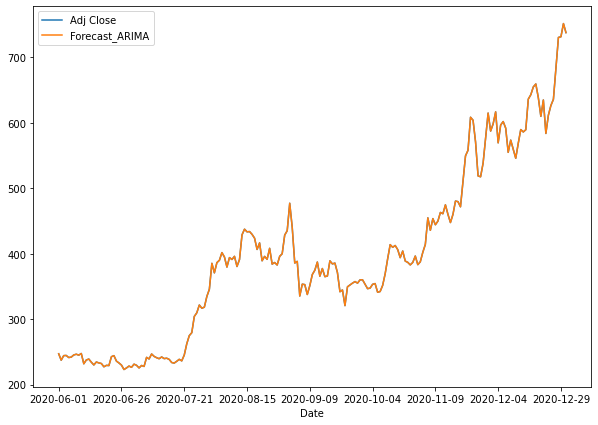

In [219]:
test_data[['Adj Close','Forecast_ARIMA']].plot(figsize=(10,7))